<a href="https://colab.research.google.com/github/Mahdi-Abdollahii/NGC_6822/blob/main/NGC6822_ISO_01_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

We extract isochrones from this website : http://stev.oapd.inaf.it/cgi-bin/cmd

In [1]:
!git clone https://github.com/Mahdi-Abdollahii/NGC_6822.git

Cloning into 'NGC_6822'...
remote: Enumerating objects: 155, done.
remote: Counting objects: 100% (49/49), done.
remote: Compressing objects: 100% (46/46), done.
remote: Total 155 (delta 19), reused 3 (delta 3), pack-reused 106
Receiving objects: 100% (155/155), 4.80 MiB | 4.99 MiB/s, done.
Resolving deltas: 100% (53/53), done.


In [3]:
%matplotlib inline
from matplotlib import cm
import matplotlib.pyplot as plt
import pylab as py
from matplotlib import gridspec
import numpy as np
import pandas as pd
from astropy.io import ascii
import csv
import matplotlib.colors as mcolors
from matplotlib.font_manager import FontProperties
import matplotlib.markers as mmark
import matplotlib.lines as mlines
from matplotlib.legend_handler import HandlerBase
from matplotlib.ticker import MultipleLocator
from matplotlib.ticker import FormatStrFormatter
from matplotlib.ticker import AutoMinorLocator

import matplotlib.ticker as ticker
from mpl_toolkits.axes_grid1 import host_subplot
from matplotlib.patches import Rectangle
import matplotlib.colors as mcolor

In [4]:
file_address = '/content/NGC_6822/Data/final_cleaned_data.csv'
df = pd.read_csv(file_address , index_col='Mid')
df = df.fillna(89.99)

In [5]:
df_Whitelock = pd.read_csv('/content/NGC_6822/Data/Whitelock.csv')
df_Whitelock

,Seq( ),RAJ2000(deg),DEJ2000(deg),M( ),Jmag(mag),e_Jmag(mag),o_Jmag( ),Hmag(mag),e_Hmag(mag),o_Hmag( ),Ksmag(mag),e_Ksmag(mag),o_Ksmag( ),J-H(mag),H-Ks(mag),J-Ks(mag),recno()
0,30370.0,296.17061,-14.95234,,17.588,0.087,7.0,17.170,0.044,10.0,17.138,0.078,9.0,0.418,0.032,0.450,1.0
1,31395.0,296.17062,-14.96028,,18.749,0.136,14.0,17.952,0.057,14.0,17.686,0.069,12.0,0.797,0.266,1.063,2.0
2,30746.0,296.17076,-14.97089,,17.537,0.033,13.0,17.091,0.040,14.0,17.061,0.078,14.0,0.446,0.030,0.476,3.0
3,31721.0,296.17082,-14.88634,,18.644,0.072,11.0,17.683,0.047,12.0,17.429,0.085,12.0,0.961,0.254,1.215,4.0
4,30982.0,296.17091,-14.89924,,17.498,0.021,11.0,17.000,0.049,15.0,16.867,0.057,13.0,0.498,0.133,0.631,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6252,21898.0,296.30447,-14.65989,,18.322,0.082,5.0,17.810,0.089,4.0,17.493,0.198,4.0,0.512,0.317,0.829,6253.0
6253,40643.0,296.30451,-14.75199,,16.742,0.011,6.0,16.021,0.083,8.0,15.823,0.099,6.0,0.721,0.198,0.919,6254.0
6254,10482.0,296.30455,-14.77980,,16.202,0.017,3.0,15.658,0.413,5.0,15.564,0.019,3.0,0.544,0.094,0.638,6255.0
6255,12680.0,296.30462,-14.76793,,17.940,0.010,3.0,16.843,0.371,5.0,16.656,0.012,2.0,1.097,0.187,1.284,6256.0


In [6]:
DM = 23.45 # based on sibbons => (Mateo 1998; Lee et al. 1993)

Av = 0.77  # based on whitelock 2012
Aj = 0.2   # based on whitelock 2012
Ah = 0.12  # based on whitelock 2012
Ak = 0.78  # based on whitelock 2012

RGBT = 17.42 # based on whitelock 2012

X = (df['J']-Aj)  -  (df['Ks']-Ak)
Y = (df['Ks']-Ak)

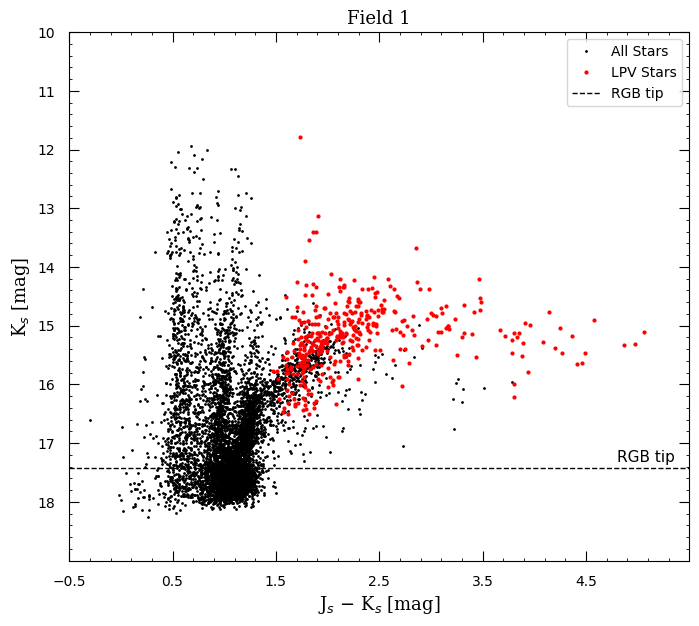

In [7]:
plt.figure(figsize = (8,7), dpi = 100)

plt.title('Field 1', fontsize = 13, fontname = "serif")

plt.tick_params(axis='both',which='major', length=7    ,pad=10,direction='in')
plt.tick_params(axis='y'   ,which='both' ,left= True   ,direction='in')
plt.tick_params(axis='x'   ,which='both' ,bottom= True ,direction='in')
plt.tick_params(axis='x'   ,which='both' ,top= True    ,direction='in')
plt.tick_params(axis='y'   ,which='both' ,right= True  ,direction='in')
plt.minorticks_on()

xmax , xmin = 5.5 , -0.5
ymax , ymin = 19  , 10 

plt.xticks(np.arange(xmin , xmax , step=1))
plt.yticks(np.arange(ymin , ymax , step=1))
plt.xlim(xmin, xmax )
plt.ylim(ymax, ymin )

#Selected Stars 'LPV'
plt.xlabel('J$_s$ $-$ K$_s$ [mag]', fontsize = 13, fontname = "serif")
plt.ylabel('K$_s$ [mag]'          , fontsize = 13, fontname = "serif")

#All stars
plt.plot(df_Whitelock['Jmag(mag)'] - df_Whitelock['Ksmag(mag)'], df_Whitelock['Ksmag(mag)'] ,'k.', markersize = '2', label = 'All Stars')
plt.plot(X, Y,'r.', markersize = '4', label = 'LPV Stars')

#RGBT
plt.axhline(y= RGBT , linewidth=1, color='k', linestyle='--', label = 'RGB tip')
plt.text( xmax - 0.7 , RGBT - 0.1 , 'RGB tip', fontsize=11)

plt.legend(loc='upper right')
plt.savefig('CMD-Field1.jpeg', bbox_inches='tight', dpi = 400)

# Adding Isochrones

In [8]:
!pip install git+https://github.com/Mahdi-Abdollahii/AstroDC.git 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/Mahdi-Abdollahii/AstroDC.git to /tmp/pip-req-build-jo62em9k
  Running command git clone --filter=blob:none --quiet https://github.com/Mahdi-Abdollahii/AstroDC.git /tmp/pip-req-build-jo62em9k
  Resolved https://github.com/Mahdi-Abdollahii/AstroDC.git to commit 0e7dd7e6fa8a2728f3d9e124e5052309e3030988
  Preparing metadata (setup.py) ... done
  Created wheel for AstroDC: filename=AstroDC-1.0.4-py3-none-any.whl size=2576 sha256=66a19097b8fd716d8eeb1072e76fbd8b1811fd7e69dd4b21ea6f98bf0f15e875
  Stored in directory: /tmp/pip-ephem-wheel-cache-w7u0iisg/wheels/3a/dd/30/3b5d25852c9372703f4d564c038363f5a68f610031b9fd3335
Successfully built AstroDC


In [9]:
from AstroDC import AstroDC

In [11]:
AstroDC.Stev_Isochrom_CSV('/content/NGC_6822/Data_Isochrones/ISO_01_01.dat','ISO_01_01')

# File generated by CMD 3.7 (http://stev.oapd.inaf.it/cmd) on Wed Jan 25 23:38:44 CET 2023
# isochrones based on PARSEC release v1.2S +  COLIBRI S_37 + S_35 + PR16
# Basic references: Bressan et al. (2012), MNRAS, 427, 127 + Chen et al. (2014, 2015), MNRAS, 444, 2525 + MNRAS, 452, 1068 + Tang et al. (2014), MNRAS, 445, 4287 + Marigo et al. (2017), ApJ, 835, 77 + Pastorelli al. (2019), MNRAS, 485, 5666 + Pastorelli al. (2020), MNRAS, in press
# Thermal pulse cycles included 
# On RGB, assumed Reimers mass loss with efficiency eta=0.1
# LPV periods and growth rates added cf. Trabucchi et al. (2019)
# but fundamental-mode LPV periods are from Trabucchi et al. (2021)
# Photometric system: <i>UBVRIJHK</i> (cf. Maiz-Apellaniz 2006 + Bessell 1990)
# Attention: photometry includes extinction of Av=0.77, with coefficients derived for the Sun, for Cardelli et al 89 + O'Donnell 94 Rv=3.1 extinction curve.
# Using OBC version of bolometric corrections as detailed in Marigo et al. (2008, A&A 482, 8

In [14]:
ISO_df= pd.read_csv("ISO_0001_01.csv")
ISO_df

,Zini,MH,logAge,Mini,int_IMF,Mass,logL,logTe,logg,label,...,Z,mbolmag,Umag,Bmag,Vmag,Rmag,Imag,Jmag,Hmag,Kmag
0,0.01,-0.17553,6.60000,0.090000,1.081690,0.090,-1.585,3.4321,3.658,0,...,0.010000,8.733,15.392,14.740,13.448,11.542,9.309,6.926,6.279,5.913
1,0.01,-0.17553,6.60000,0.091297,1.093999,0.091,-1.582,3.4325,3.663,0,...,0.010000,8.726,15.402,14.727,13.424,11.523,9.294,6.920,6.273,5.907
2,0.01,-0.17553,6.60000,0.100000,1.171106,0.100,-1.565,3.4348,3.694,0,...,0.010000,8.683,15.490,14.660,13.278,11.411,9.205,6.883,6.240,5.876
3,0.01,-0.17553,6.60000,0.109283,1.244281,0.109,-1.527,3.4394,3.713,0,...,0.010000,8.587,15.545,14.518,13.049,11.221,9.042,6.795,6.150,5.798
4,0.01,-0.17553,6.60000,0.120116,1.320078,0.120,-1.505,3.4423,3.744,0,...,0.010000,8.534,15.693,14.457,12.894,11.095,8.934,6.749,6.104,5.759
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20655,0.01,-0.17553,10.10001,0.935630,2.458368,0.683,3.335,3.5055,-0.089,7,...,0.011200,-3.568,4.274,3.075,1.495,-0.545,-2.723,-5.182,-6.218,-6.586
20656,0.01,-0.17553,10.10001,0.935630,2.458368,0.672,3.361,3.5040,-0.127,7,...,0.011200,-3.632,4.263,3.111,1.543,-0.539,-2.744,-5.251,-6.287,-6.660
20657,0.01,-0.17553,10.10001,0.935630,2.458368,0.664,3.368,3.5058,-0.133,7,...,0.011200,-3.650,4.237,3.019,1.423,-0.624,-2.806,-5.263,-6.298,-6.668
20658,0.01,-0.17553,10.10001,0.935630,2.458368,0.661,3.369,3.5098,-0.120,7,...,0.011200,-3.653,4.187,2.825,1.174,-0.787,-2.913,-5.253,-6.284,-6.650


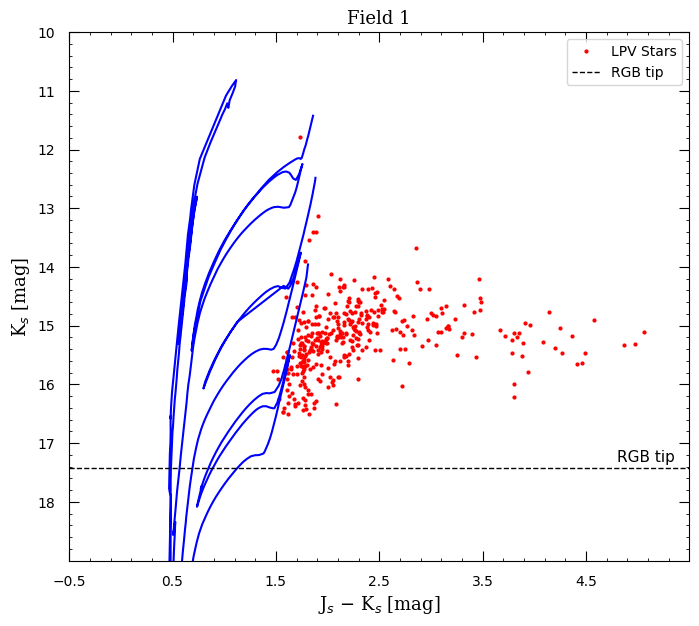

In [15]:
plt.figure(figsize = (8,7), dpi = 100)

plt.title('Field 1', fontsize = 13, fontname = "serif")

plt.tick_params(axis='both',which='major', length=7    ,pad=10,direction='in')
plt.tick_params(axis='y'   ,which='both' ,left= True   ,direction='in')
plt.tick_params(axis='x'   ,which='both' ,bottom= True ,direction='in')
plt.tick_params(axis='x'   ,which='both' ,top= True    ,direction='in')
plt.tick_params(axis='y'   ,which='both' ,right= True  ,direction='in')
plt.minorticks_on()

xmax , xmin = 5.5 , -0.5
ymax , ymin = 19  , 10 

plt.xticks(np.arange(xmin , xmax , step=1))
plt.yticks(np.arange(ymin , ymax , step=1))
plt.xlim(xmin, xmax )
plt.ylim(ymax, ymin )

#Selected Stars 'LPV'
plt.xlabel('J$_s$ $-$ K$_s$ [mag]', fontsize = 13, fontname = "serif")
plt.ylabel('K$_s$ [mag]'          , fontsize = 13, fontname = "serif")

#All stars
plt.plot(X, Y,'r.', markersize = '4', label = 'LPV Stars')

#ISO
LOG_AGE = [6.6, 7, 7.4, 7.8, 8.2, 8.6, 9, 9.4, 9.8, 10.2]

for i in LOG_AGE : 
  X_ISO = (ISO_df[ ISO_df['logAge'] == i ]['Jmag'] - Aj)  -  (ISO_df[ ISO_df['logAge'] == i ]['Kmag'] - Ak)
  Y_ISO = (ISO_df[ ISO_df['logAge'] == i ]['Kmag'] - Ak) + DM
  plt.plot(X_ISO,Y_ISO , 'blue')
   
#RGBT
plt.axhline(y= RGBT , linewidth=1, color='k', linestyle='--', label = 'RGB tip')
plt.text( xmax - 0.7 , RGBT - 0.1 , 'RGB tip', fontsize=11)

plt.legend(loc='upper right')
plt.savefig('CMD-Field1.jpeg', bbox_inches='tight', dpi = 400)